# Evaluation Notebook for CNAE Group 11 Experiments

### How to:
#### Use the next code block to upload Locust datasets (or mount your Google Drive) to add data.


1.   exceptions.csv
2.   failures.csv
3.   report.html
4.   requests.csv


## Initial installation

In [37]:
#initial installation
!pip install numpy
!pip install pandas
!pip install matplotlib

In [38]:
# install packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Upload files

In [39]:
# from google.colab import files
# uploaded = files.upload()

### Connect Drive

In [40]:
#or connect you drive to add the csv-files
#from google.colab import drive
#drive.mount('/content/drive')

### Reference locally

In [41]:
exceptions = pd.read_csv("Data/exceptions.csv")
failures = pd.read_csv("Data/failures.csv")
requests = pd.read_csv("Data/requests.csv")
requests_2 = pd.read_csv("Data/requests_2.csv")

# Plots
### Failures: Distribution of Failures per Name

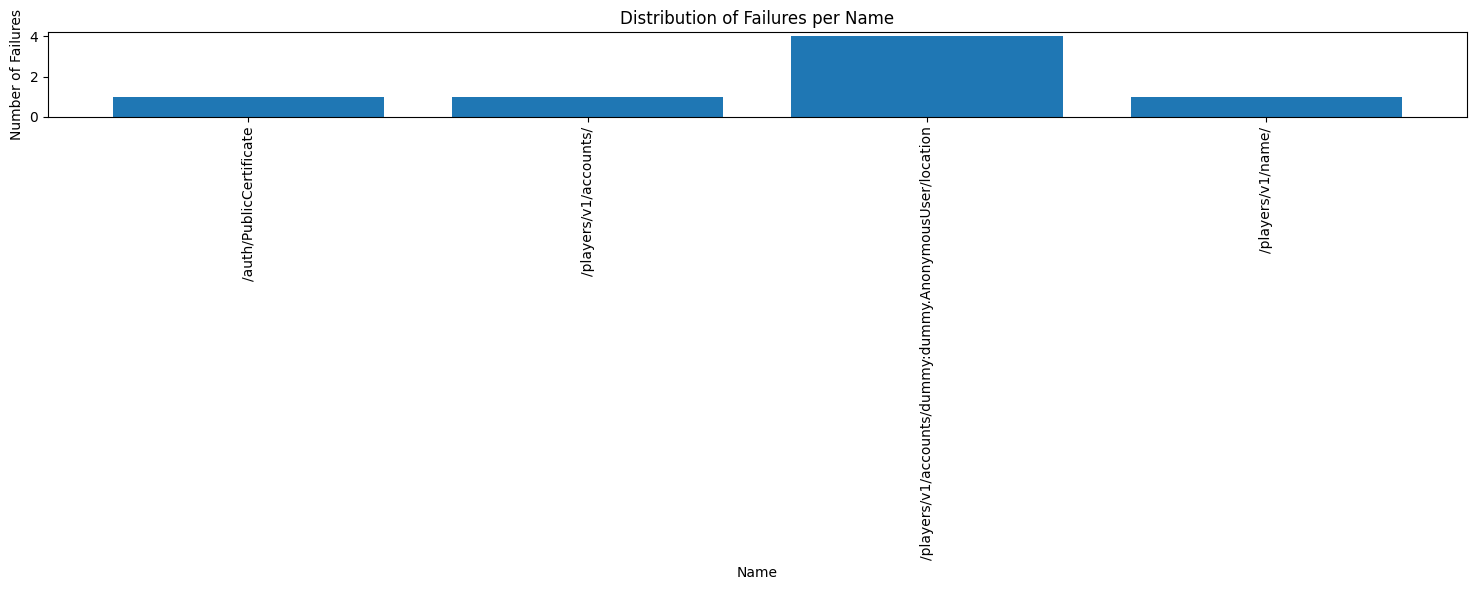

In [42]:
# Group data by 'Name' and sum the 'Occurrences'
failures_grouped_by_name = failures.groupby('Name')['Occurrences'].sum().reset_index()

# Plot histogram for distribution of failures per name
plt.figure(figsize=(15, 6))
plt.bar(failures_grouped_by_name['Name'], failures_grouped_by_name['Occurrences'])
plt.xlabel('Name')
plt.ylabel('Number of Failures')
plt.title('Distribution of Failures per Name')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()



## Requests

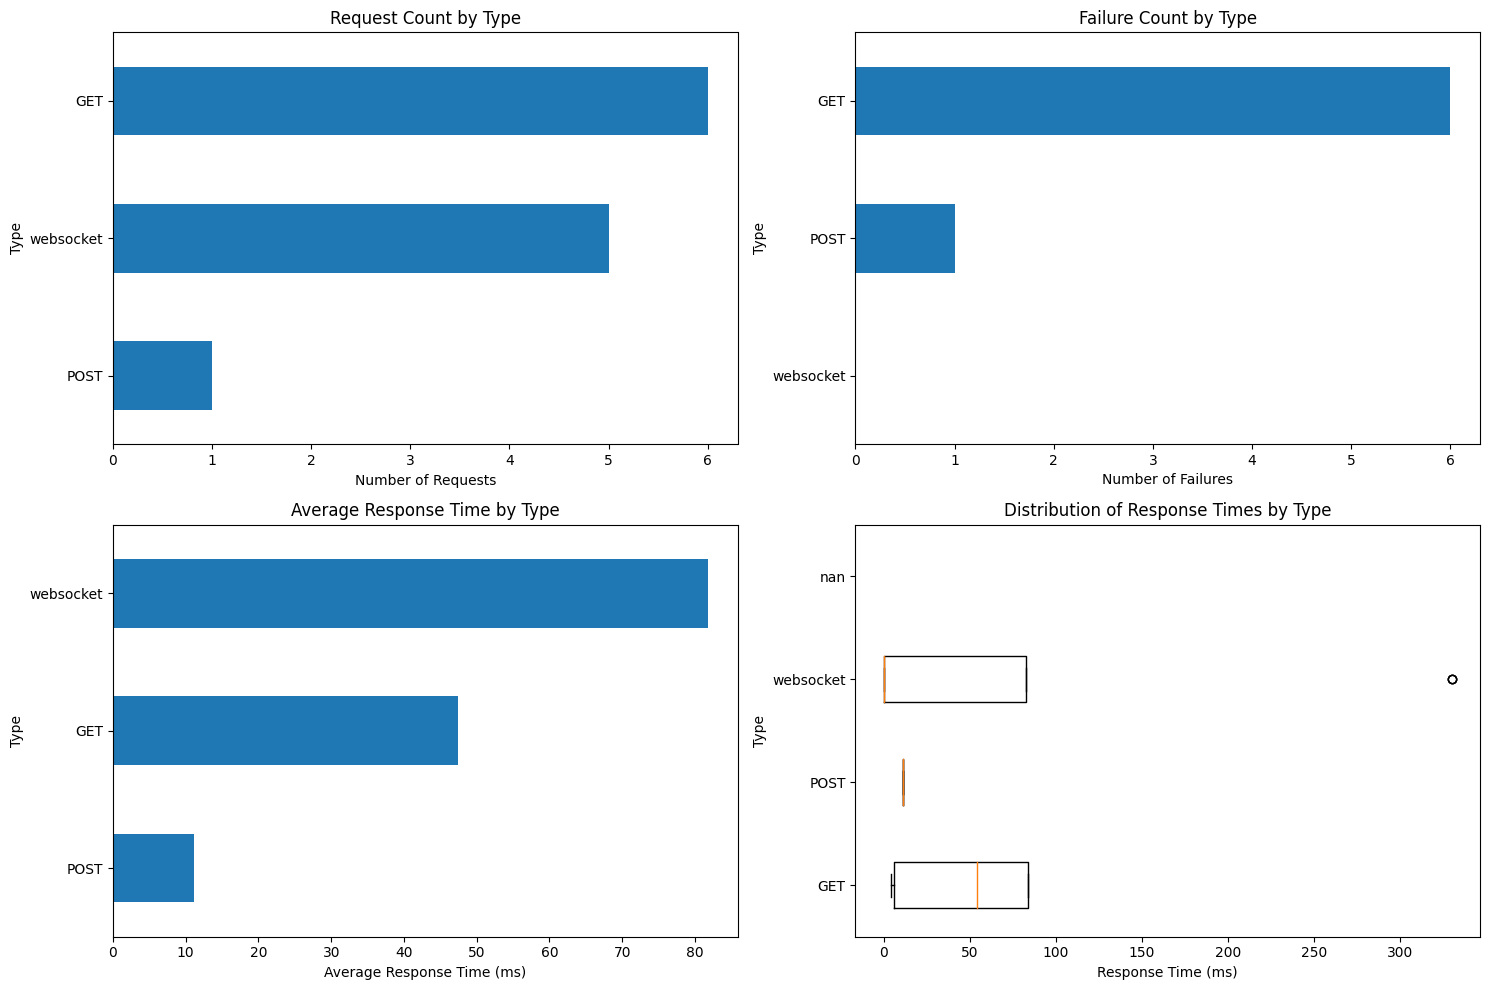

In [43]:
# Set up the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 1. Request Count by Type
requests.groupby('Type')['Request Count'].sum().sort_values().plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Request Count by Type')
axes[0, 0].set_xlabel('Number of Requests')
axes[0, 0].set_ylabel('Type')

# 2. Failure Count by Type
requests.groupby('Type')['Failure Count'].sum().sort_values().plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Failure Count by Type')
axes[0, 1].set_xlabel('Number of Failures')
axes[0, 1].set_ylabel('Type')

# 3. Average Response Time by Type
requests.groupby('Type')['Average Response Time'].mean().sort_values().plot(kind='barh', ax=axes[1, 0])
axes[1, 0].set_title('Average Response Time by Type')
axes[1, 0].set_xlabel('Average Response Time (ms)')
axes[1, 0].set_ylabel('Type')

# 4. Distribution of Response Times for Each Type (using 50%, 75% and 95% percentiles)
box_data = [requests[requests['Type'] == type_][['50%', '75%', '95%']].values.flatten() for type_ in requests['Type'].unique()]
axes[1, 1].boxplot(box_data, vert=False, labels=requests['Type'].unique())
axes[1, 1].set_title('Distribution of Response Times by Type')
axes[1, 1].set_xlabel('Response Time (ms)')
axes[1, 1].set_ylabel('Type')

plt.tight_layout()
plt.show()


## Failures: Compare two measurements 

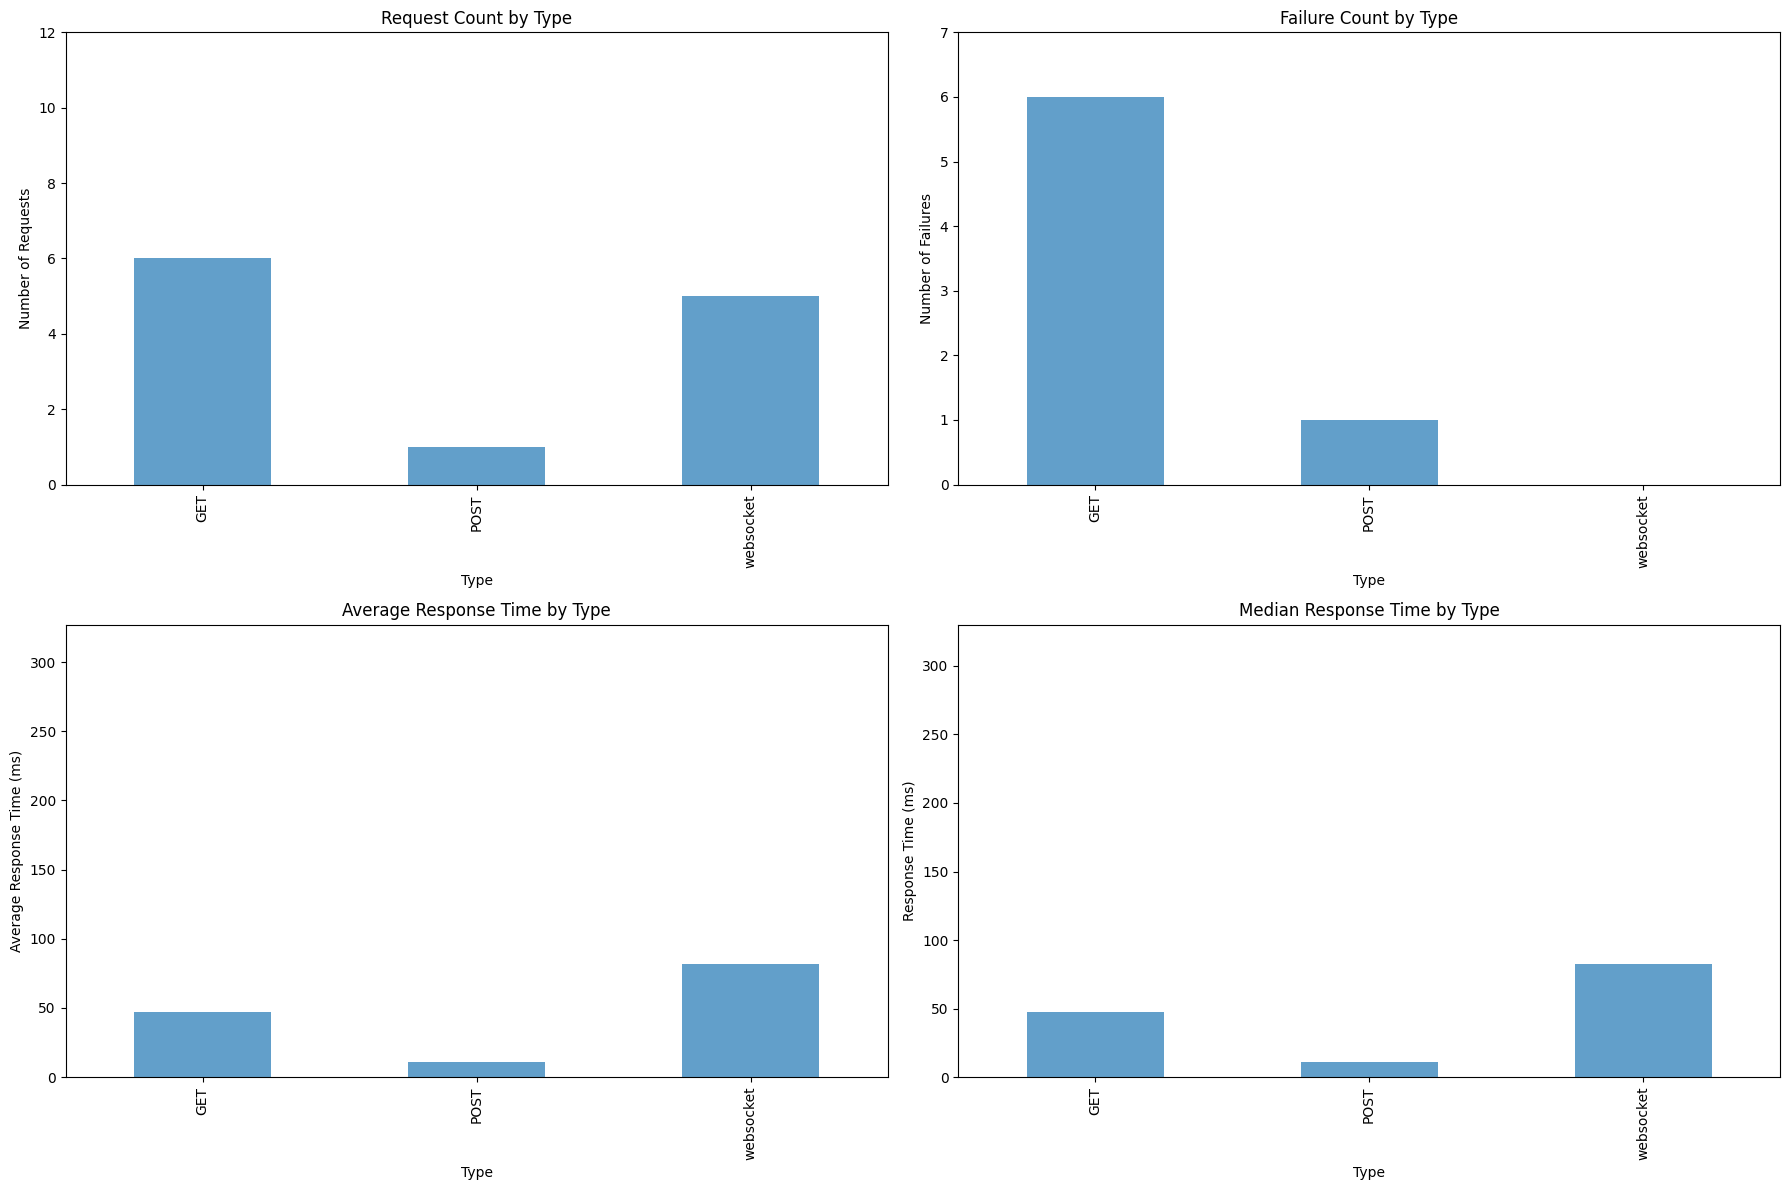

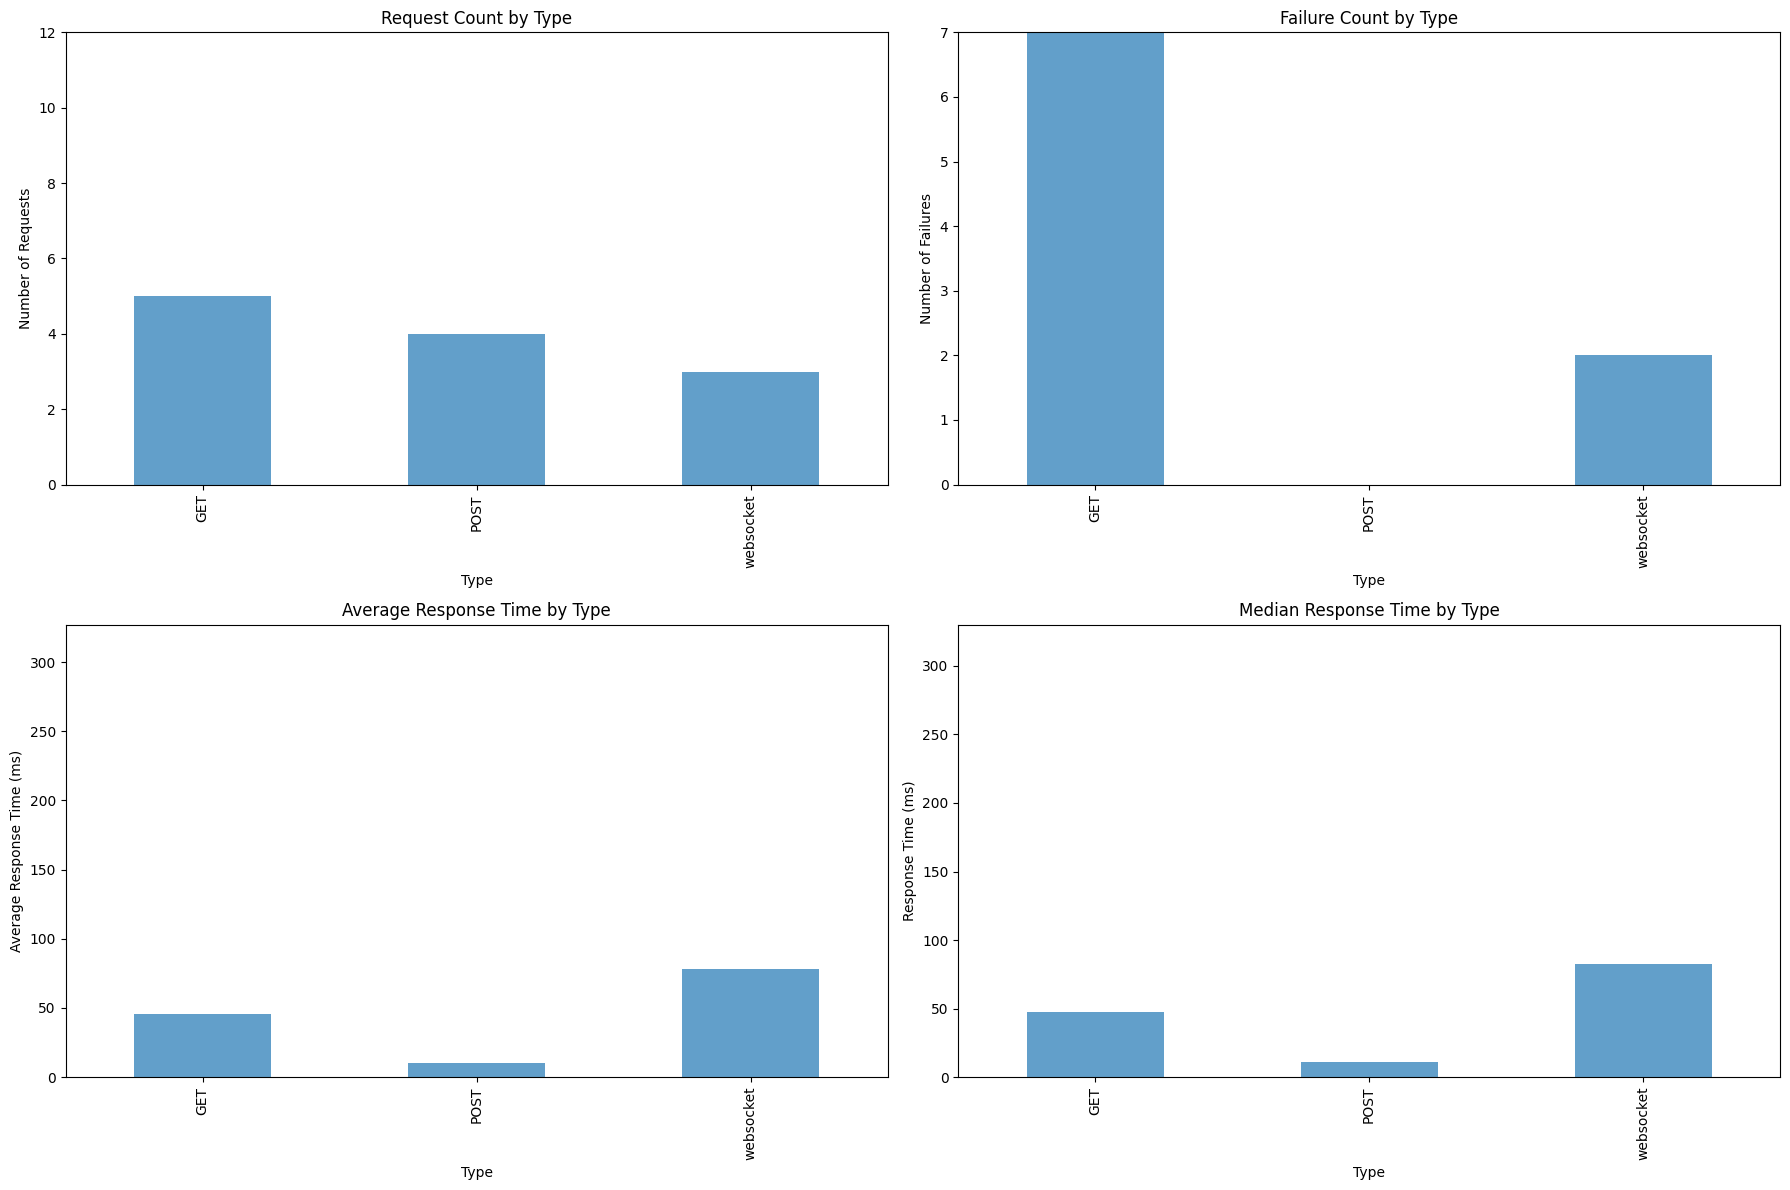

In [44]:
# Helper function to get consistent y-axis limits based on both datasets
def get_common_ylim(metric_col, datasets):
    min_val = min(data[metric_col].min() for data in datasets)
    max_val = max(data[metric_col].max() for data in datasets)
    return min_val, max_val

# Compute consistent y-axis limits
request_count_ylim = get_common_ylim('Request Count', [requests, requests_2])
failure_count_ylim = get_common_ylim('Failure Count', [requests, requests_2])
avg_response_time_ylim = get_common_ylim('Average Response Time', [requests, requests_2])
median_response_time_ylim = get_common_ylim('50%', [requests, requests_2])

# Helper function to plot individual dataset with consistent y-axis
def plot_individual_data_with_ylim(data, label, axes, ylims):
    # Request Count by Type
    request_counts = data.groupby('Type')['Request Count'].sum()
    request_counts.plot(kind='bar', ax=axes[0, 0], label=label, alpha=0.7)
    axes[0, 0].set_ylim(ylims[0])
    
    # Failure Count by Type
    failure_counts = data.groupby('Type')['Failure Count'].sum()
    failure_counts.plot(kind='bar', ax=axes[0, 1], label=label, alpha=0.7)
    axes[0, 1].set_ylim(ylims[1])
    
    # Average Response Time by Type
    avg_response_times = data.groupby('Type')['Average Response Time'].mean()
    avg_response_times.plot(kind='bar', ax=axes[1, 0], label=label, alpha=0.7)
    axes[1, 0].set_ylim(ylims[2])

    # Median Response Time by Type
    median_response_times = data.groupby('Type')['50%'].mean()
    median_response_times.plot(kind='bar', ax=axes[1, 1], label=label, alpha=0.7)
    axes[1, 1].set_ylim(ylims[3])

# Set consistent y-axis labels and titles
def set_axes_labels_and_titles(axes):
    axes[0, 0].set_title('Request Count by Type')
    axes[0, 0].set_ylabel('Number of Requests')
    axes[0, 0].set_xlabel('Type')
    
    axes[0, 1].set_title('Failure Count by Type')
    axes[0, 1].set_ylabel('Number of Failures')
    axes[0, 1].set_xlabel('Type')
    
    axes[1, 0].set_title('Average Response Time by Type')
    axes[1, 0].set_ylabel('Average Response Time (ms)')
    axes[1, 0].set_xlabel('Type')
    
    axes[1, 1].set_title('Median Response Time by Type')
    axes[1, 1].set_ylabel('Response Time (ms)')
    axes[1, 1].set_xlabel('Type')

# Set up the plots for "First Measurement"
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plot_individual_data_with_ylim(requests, 'First Measurement', axes1, [request_count_ylim, failure_count_ylim, avg_response_time_ylim, median_response_time_ylim])
set_axes_labels_and_titles(axes1)
plt.tight_layout()
plt.show()

# Set up the plots for "Second Measurement"
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plot_individual_data_with_ylim(requests_2, 'Second Measurement', axes2, [request_count_ylim, failure_count_ylim, avg_response_time_ylim, median_response_time_ylim])
set_axes_labels_and_titles(axes2)
plt.tight_layout()
plt.show()
